In [1]:
import numpy as np
from matplotlib import pyplot as plt
import pickle

import sys
sys.path.insert(0,'../src/')

from utils import *
from multiply_connected_pipe import *
from pipe_system import PipeSystem
from abstract_pipe import *
from curve import *

In [2]:
with open('pipes_and_shifts.pickle','rb') as f:
    pipes_and_shifts = pickle.load(f)
    pipes = [p for p,_ in pipes_and_shifts]
    shifts = [s for _,s in pipes_and_shifts]
    

i = 0
while i < len(pipes):
    if pipes[i] in pipes[:i]:
        pipes.pop(i)
    else:
        i+=1

In [3]:
def plyg_bdr(pipe):
    pts = []
    for c in pipe.exterior_boundary.curves:
        pts += [c.start_pt]
        if isinstance(c, Corner):
            pts += [c.mid_pt]
    
    return np.array(pts + [pts[0]]).T

In [4]:
pipe = pipes[2]

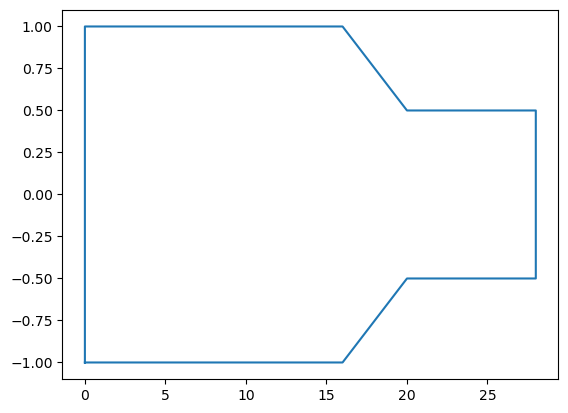

In [5]:
plt.plot(*plyg_bdr(pipes[2]))

In [6]:
pipe.build_geometry(required_tol=1e-12)
pipe.build_A(fmm=True)
    
matching_points = np.array([i.matching_pt for i in pipe.lets])
matching_points_z = matching_points[:,0] + 1j*matching_points[:,1]
pairs_needing_correction = np.array(pipe.mat_vec.pairs_needing_correction(matching_points_z))

0

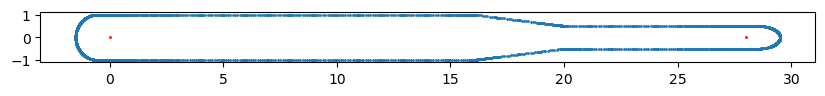

In [7]:
fig, ax  =  plt.subplots(figsize=(10,10))
ax.set_aspect('equal')

ax.scatter(pipe.t.real, pipe.t.imag,s=1)
ax.scatter(matching_points[:,0], matching_points[:,1],s=1,c='r')

panels = []


for p,c in zip(pipe.panels, pairs_needing_correction):
    if np.any(c):
        print(c)
        ax.scatter(p.t.real, p.t.imag, s=1, c='r')
        panels.append(p)
len(panels)
        